# Part 1: Numpy practice

(If you get stuck at one part, try the other part)

Import the numpy library with the alias 'np'

In [154]:
#__SOLUTION__
import numpy as np

Create a variable called x that is a list of 100 0s

In [155]:
#__SOLUTION__

x = [num for num in range(0,100)]

#or
x = [].extend(
    range(0,100)
    )

#or
x = []

for num in range(0,100):
    x.append(num)
    
#or

x = [0]*100

Find another way to create a list of 100 0s; assign it to a new variable called y

In [156]:
#__SOLUTION__

y = [num for num in range(0,100)]

#or
y = [].extend(
    range(0,100)
    )

#or
y = []

for num in range(0,100):
    y.append(num)
    
#or

y = [0]*100

Turn x and y into numpy arrays

In [157]:
#__SOLUTION__

x = np.array(x)

y = np.array(y)

In both x and y, insert the first 100 counting numbers in-between the 0s

With x, start inserting counting numbers at position 1

With y, start at position 0

In [158]:
#__SOLUTION__

x = np.insert(x, range(0, 100), range(1,101)) 

y = np.insert(y, range(1,101), range(1,101))

Remove all the 0s from both x and y

Use different methods of removal for x and y

In [159]:
#__SOLUTION__

x = x[x!=0]

y = y[1::2]

# Part 2: Estimating pi (with vis!)

Let's first import pyplot from matplotlib under the alias plt

(Also, run the commend %matplotlib inline so that jupyter renders the plots inside the notebook)

In [481]:
#__SOLUTION__

import matplotlib.pyplot as plt

%matplotlib inline

Picture a circle perfectly circumscribed inside a unit square

The radius of the circle is $\frac{1}{2}$, and the area of the circle is $\pi \times (\frac{1}{2})^2 = \frac{\pi}{4}$

If we randomly throw enough points inside that square: 

 $$ \frac{\mbox{points that land in circle}}{\mbox{total points}} \approx \frac{\pi}{4} $$

so

$$ 4 \times \frac{\mbox{points that land in circle}}{\mbox{total points}} \approx \pi $$

We're going to create a plot that, inside of a unit square whose lower-left corner is at (0,0):
- plots 1000 random points
- colors them differently if they're inside or outside the circle
- calculates the error of the estimate of pi and prints it as the title of the graph

First we're going to create the points to throw inside the square.

Use numpy to create a variable x that has 1000 randomly drawn numbers between 0 and 1.

Use numpy to creat another variable y that has a different set of 1000 randomly-drawn numbers b/t 0 and 1.

(These are the x and y coordinates for the random points we'll throw at the square and inscribed circle)

In [446]:
#__SOLUTION__

x = np.random.random(int(1000))
y = np.random.random(int(1000))

Select all the points in x that satisfy the condition
$$ (x^2 + y^2)<=\frac{1}{2} $$
and assign them to the variable inside_x

Do the same thing for the points in y, and assign them to the variable inside_y

(These are the x and y coordinates of the points inside the circle)

<i>Hint: the formula for a circle centered at (h,k) with radius r is</i> 
    $$(x-h)^2 + (y-k)^2 = r^2$$
<i>Where is the center of a circle inscribed in a unit square whose lower-left corner is at (0,0)?</i>

In [447]:
#__SOLUTION__

inside_x,  inside_y  = x[(x-.5)**2+(y-.5)**2<(.5)**2], y[(x-.5)**2+(y-.5)**2<(.5)**2]

Do the same thing for the points that lie within the square but outside the circle

Ie, select all the points in x and y that satisfy the condition
$$ (x^2 + y^2)>\frac{1}{2} $$
assign them to the variables outside_x and outside_y, respectively

In [448]:
#__SOLUTION__

outside_x, outside_y = x[(x-.5)**2+(y-.5)**2>(.5)**2], y[(x-.5)**2+(y-.5)**2>(.5)**2]

Now we'll calculate our $\pi$ estimate and the error from that estimate

Create the following variables:
- the number of pts inside the circle
    - name this variable pts_in_circle
    
    
- the number of pts outside the circle
    - name this variable pts_out_circle
    
    
- an estimate for $\pi$ that uses pts_in_circle and pts_out_circle
    - name this variable pi_est

    
- a calculation of the pct error of pi_est 
    - name this variable pi_est_error_pct

In [462]:
#__SOLUTION__

pts_in_circle = len(inside_x)
pts_out_circle = len(outside_x)

pi_est = 4*(pts_in_circle)/(pts_in_circle+pts_out_circle)
pi_est_error_pct = (abs(pi_est-np.pi)/np.pi)*100

pi_est_error_pct_rounded = np.round(pi_est_error_pct*100)/100

Now, create a scatter plot of the "inside circle" points.  Color them blue, with alpha=.8 and edgecolor=None.

Create another scatter plot of the "outside circle" points.  Color them red, same alpha / edgecolor as above.

Plot both scatter plots in the same graph.

Call the title of the graph "Inscribed Circle in Unit Square to Estimate Pi".  Below the graph, print out a sentence saying what the pi estimate and pct error are using the variables pi_est and pi_est_error_pct.  

If you have time, try and figure out how to round to only include two digits in the pct error.

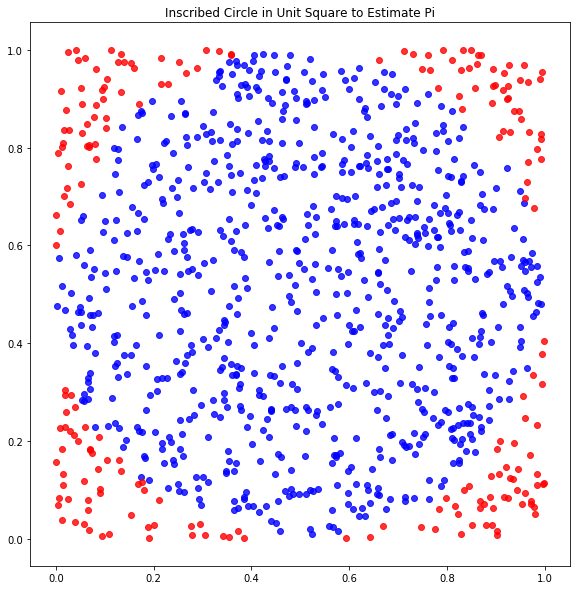

Using points from above graph, estimate of pi based on 1000 points is 3.164, w/ 0.71 % error


In [480]:
#__SOLUTION__

fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(inside_x, inside_y, color='b', alpha=.8, edgecolor=None)
ax.scatter(outside_x, outside_y, color='r', alpha=.8, edgecolor=None)
ax.set_aspect('equal')
ax.set_title(f'Circle Inscribed in Unit Square to Estimate Pi')
plt.show()
print(f'Using points from above graph, estimate of pi based on {pts_in_circle+pts_out_circle} points is {pi_est}, w/ {rounded} % error')

If you have time, repeat the above steps for 100 points 